# Geometric Transformation

In this notebook, we will learn geometric transformation of images in OpenCV-Python and how to get a transformation matrix given input and output points.

---

In [1]:
# For python2/3 compatibility
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

## 1. Geometric Transformations of Images

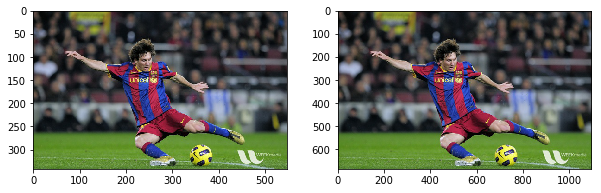

In [2]:
# Scaling
img = cv2.imread('../images/messi.jpg')
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

`dst = cv2.warpAffine(src, M, dsize, dst, flags=cv2.CV_INTER_LINEAR+cv2.CV_WARP_FILL_OUTLIERS, borderMode=cv2.BORDER_CONSTANT, borderValue=0)`

`dst = cv2.warpPerspective(src, M, dsize, dst, flags=cv2.CV_INTER_LINEAR+cv2.CV_WARP_FILL_OUTLIERS, borderMode=cv2.BORDER_CONSTANT, borderValue=0)`

- `src`: The input image.
- `M`: Transformation matrix.($2\times3$ for `cv2.warpAffine()` and $3\times3$ for `cv2.warpPerspective()`)
- `dsize`: Size of the output image.
- `flags`: Combination of interpolation methods and the optional flag `cv2.WARP_INVERSE_MAP` that means that `M` is the inverse transformation (`dst`->`src`).
- `borderMode`: Pixel extrapolation method. when `cv2.BORDER_TRANSPARENT`, the “outliers” in the source image are not modified by the function.
- `borderValue`: Value used in case of a constant border.

`pts2 = cv2.transform(pts1, M)`

`pts2 = cv2.perspectiveTransform(pts1, M)`

- `pts1`: Points to be transformed by `M`
- `M`: Transformation matrix($2\times3$ for `cv2.transform()` and $3\times3$ for `cv2.perspectiveTransform()`)

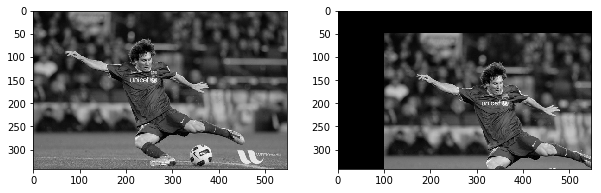

In [3]:
# Translation
img = cv2.imread('../images/messi.jpg', cv2.IMREAD_GRAYSCALE)
rows,cols = img.shape

# [ 1 0 100 ]
# [ 0 1 50  ]
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(dst, cmap='gray')

[[  6.12323400e-17   1.00000000e+00   1.03000000e+02]
 [ -1.00000000e+00   6.12323400e-17   4.45000000e+02]]


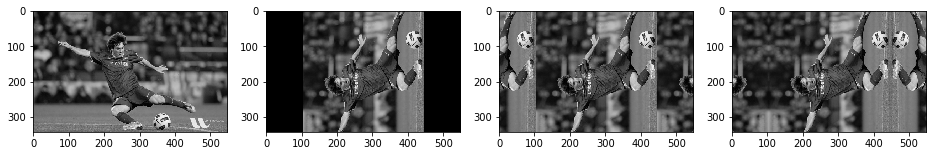

In [4]:
# Rotation
img = cv2.imread('../images/messi.jpg', cv2.IMREAD_GRAYSCALE)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
print(M)
dst1 = cv2.warpAffine(img,M,(cols,rows))
dst2 = cv2.warpAffine(img,M,(cols,rows),borderMode=cv2.BORDER_WRAP)
dst3 = cv2.warpAffine(img,M,(cols,rows),borderMode=cv2.BORDER_REFLECT)

plt.figure(figsize=(16,3))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(dst1, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(dst2, cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(dst3, cmap='gray')

---

## 2. Get Transformation Matrix

`M = cv2.getAffineTransform(src, dst)`

- `src`: Coordinates of triangle vertices in the source image.
- `dst`: Coordinates of the corresponding triangle vertices in the destination image.

`M = cv2.getPerspectiveTransform(src, dst)`

- `src`: Coordinates of quadrangle vertices in the source image.
- `dst`: Coordinates of the corresponding quadrangle vertices in the destination image.

`M = cv2.getRotationMatrix2D(center, angle, scale)`

- `center`: Center of the rotation in the source image.
- `angle`: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).
- `scale`: Isotropic scale factor.

`iM = cv2.invertAffineTransform(M)`

- `M`: Affine transformation matrix

[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


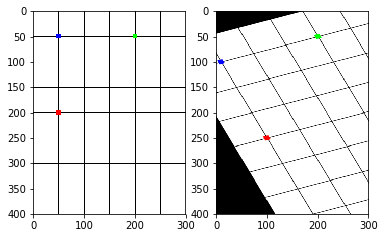

In [5]:
# Affine Transformation
img = cv2.imread('../images/drawing.png')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)
print(M)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

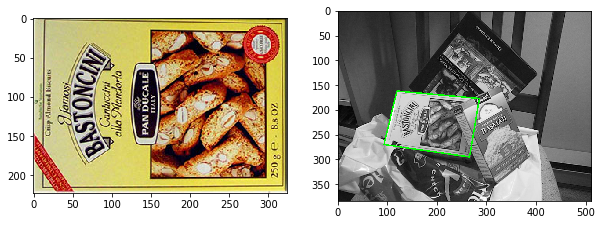

In [6]:
box = cv2.imread('../images/box_color.jpg', cv2.IMREAD_COLOR)
scene = cv2.imread('../images/box_in_scene.png', cv2.IMREAD_COLOR)

scene_copy = np.copy(scene)
corners = np.float32([(118, 162), (285, 177), (265, 295), (92, 270)])
cv2.polylines(scene_copy, np.int32([corners]), True, (0, 255, 0), 2)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(box, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(scene_copy, cv2.COLOR_BGR2RGB))

[[  4.50368322e-01  -1.35109289e-01   1.18000000e+02]
 [  5.04054493e-03   4.33683373e-01   1.62000000e+02]
 [ -2.33893127e-04  -1.95567089e-04   1.00000000e+00]]


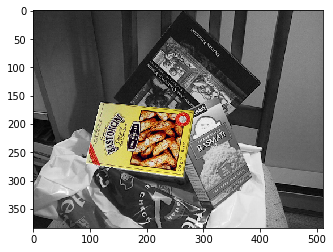

In [7]:
row1, col1, _ = box.shape
row2, col2, _ = scene.shape

src = np.float32([(0, 0), (col1-1, 0), (col1-1, row1-1), (0, row1-1)])
dst = np.float32([(118, 162), (285, 177), (265, 295), (92, 270)])
M = cv2.getPerspectiveTransform(src, dst)
print(M)

output = np.copy(scene)
cv2.warpPerspective(box, M, (col2, row2), output, borderMode=cv2.BORDER_TRANSPARENT)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

---

## Practice #1: Track Advertisement

Given an image of track and Coca-cola logo, you overlay the logo on box of the track 2

- Find homography matrix from the logo image to the track box using `cv2.getPerspectiveTransform()` method.
- Overlay the logo on the output image using `cv2.warpPerspective()` method.

Here's input images and sample outputs:

<img src="../images/track_results.png" width="800"/>

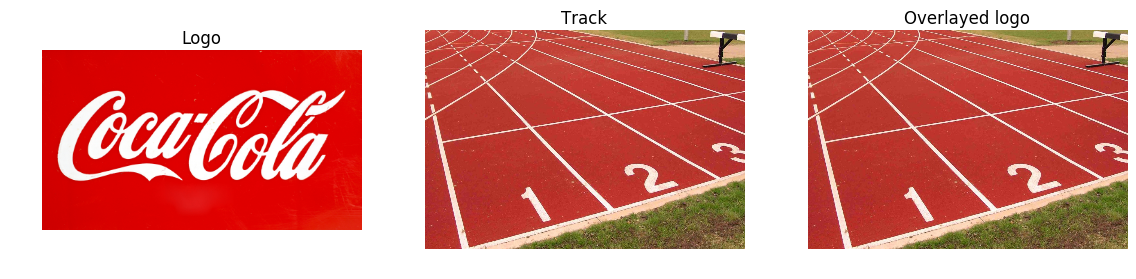

In [8]:
# Homography(Perspective Transformation)
img_track = cv2.imread('../images/track.jpg')
img_logo = cv2.imread('../images/logo.jpg')
img_output = np.copy(img_track)

# ============ YOUR CODE HERE ============
# Overlay the logo on the track(img_output)
# Four corner points of the track 2 are (671,314), (1084,546), (689,663), (386,361)

# ========================================

plt.figure(figsize=(14,3))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img_logo, cv2.COLOR_BGR2RGB)); plt.title('Logo'); plt.axis('off');
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_track, cv2.COLOR_BGR2RGB)); plt.title('Track'); plt.axis('off');
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)); plt.title('Overlayed logo'); plt.axis('off');